# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

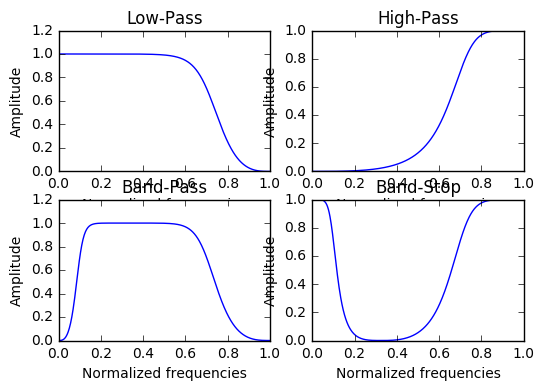

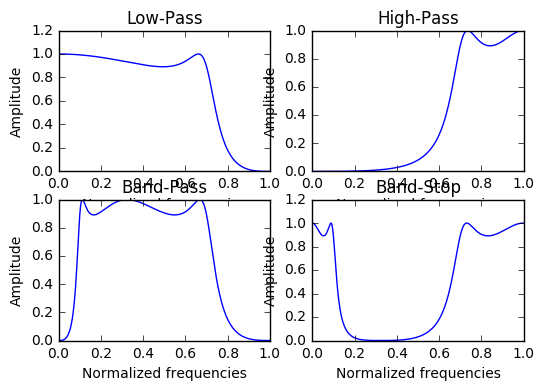

In [2]:
# Butterworth
plt.figure(1)

[b_low, a_low] = signal.butter(3, 0.7, btype='low')
[w_low, h_low] = signal.freqz(b_low, a_low)
plt.subplot(221)
plt.title('Low-Pass')
plt.plot(w_low/np.pi, np.abs(h_low))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')



[b_high, a_high] = signal.butter(3, 0.7, btype='high')
[w_high, h_high] = signal.freqz(b_high, a_high)
plt.subplot(222)
plt.title('High-Pass')
plt.plot(w_high/np.pi, np.abs(h_high))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')



[b_pass, a_pass] = signal.butter(3, [0.1, 0.7], btype='bandpass')
[w_pass, h_pass] = signal.freqz(b_pass, a_pass)
plt.subplot(223)
plt.title('Band-Pass')
plt.plot(w_pass/np.pi, np.abs(h_pass))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')


[b_stop, a_stop] = signal.butter(3, [0.1, 0.7], btype='bandstop')
[w_stop, h_stop] = signal.freqz(b_stop, a_stop)
plt.subplot(224)
plt.title('Band-Stop')
plt.plot(w_stop/np.pi, np.abs(h_stop))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')



# Chebychev-I
plt.figure(2)

[b_clow, a_clow] = signal.cheby1(3, 1, 0.7, btype='low')
[w_clow, h_clow] = signal.freqz(b_clow, a_clow)
plt.subplot(221)
plt.title('Low-Pass')
plt.plot(w_clow/np.pi, np.abs(h_clow))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')



[b_chigh, a_chigh] = signal.cheby1(3, 1, 0.7, btype='high')
[w_chigh, h_chigh] = signal.freqz(b_chigh, a_chigh)
plt.subplot(222)
plt.title('High-Pass')
plt.plot(w_chigh/np.pi, np.abs(h_chigh))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')


[b_cpass, a_cpass] = signal.cheby1(3, 1, [0.1, 0.7], btype='bandpass')
[w_cpass, h_cpass] = signal.freqz(b_cpass, a_cpass)
plt.subplot(223)
plt.title('Band-Pass')
plt.plot(w_cpass/np.pi, np.abs(h_cpass))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')


[b_cstop, a_cstop] = signal.cheby1(3, 1, [0.1, 0.7], btype='bandstop')
[w_cstop, h_cstop] = signal.freqz(b_cstop, a_cstop)
plt.subplot(224)
plt.title('Band-Stop')
plt.plot(w_cstop/np.pi, np.abs(h_cstop))
plt.xlabel('Normalized frequencies')
plt.ylabel('Amplitude')


**1.2**

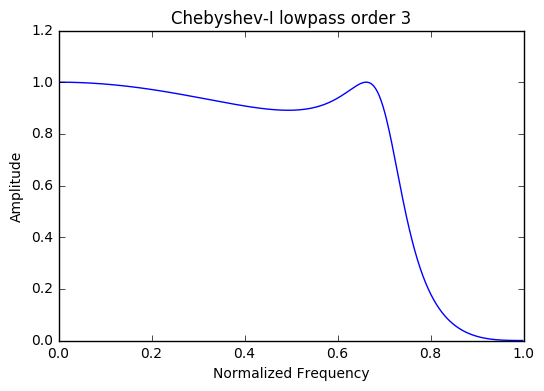

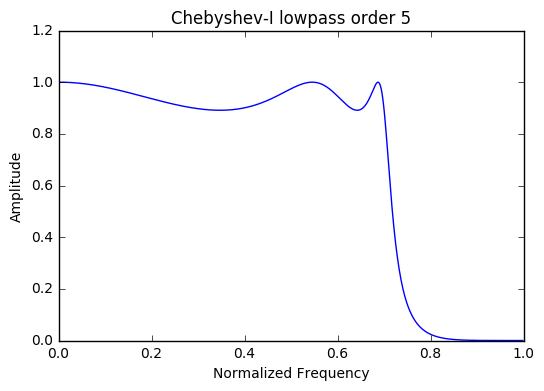

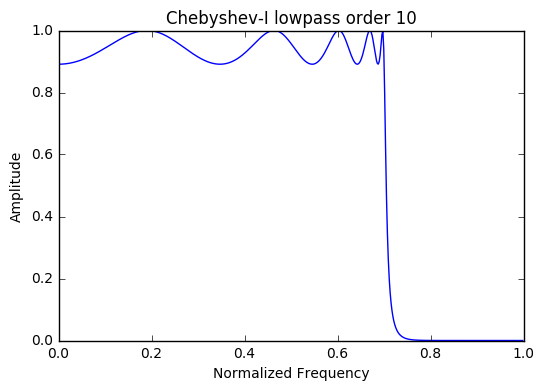

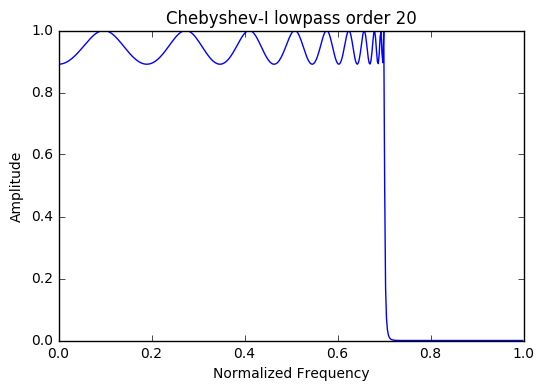

In [3]:
for f in [3,5,10,20]:
    plt.figure()
    [b, a] = signal.cheby1(f, 1, 0.7)
    [w, h] = signal.freqz(b, a)
    plt.plot(w/np.pi, np.abs(h))
    plt.title('Chebyshev-I lowpass order ' + str(f))
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Amplitude')
    plt.show()

## Recursive filter 

**2.1**

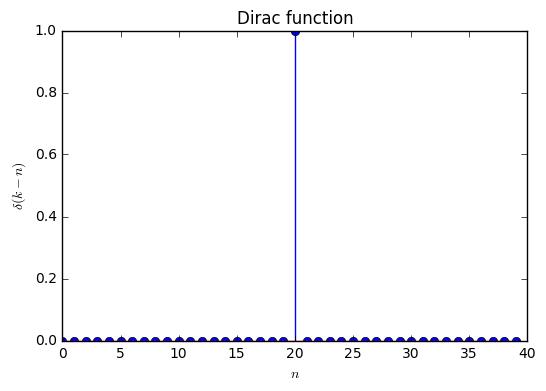

In [4]:
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s

signal = dirac(20, 40)
plt.stem(signal)
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')


**2.2**

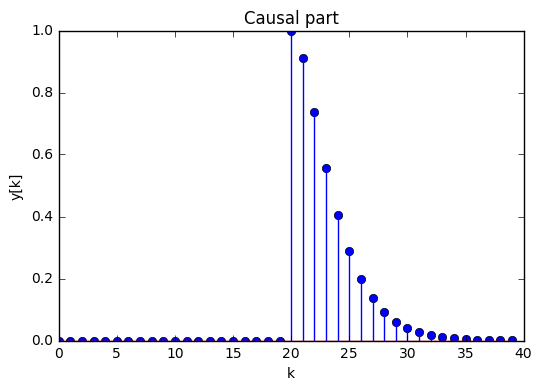

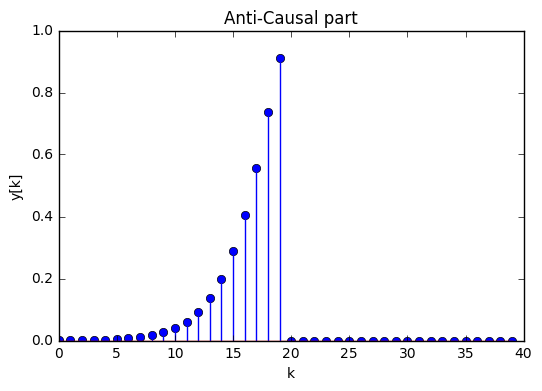

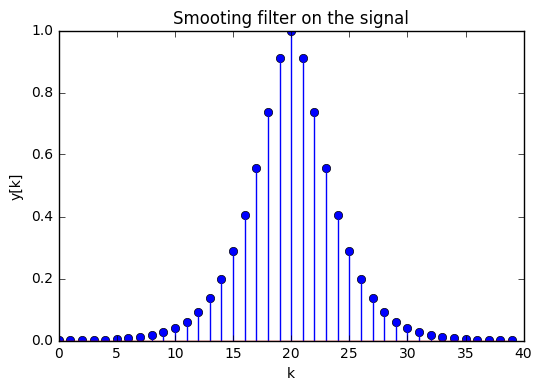

In [5]:
s = 0.5
Ts = 1
alpha = s * Ts
a = np.exp(-alpha)


yh_causal = np.zeros((40, ))
for i in range (2, 40):
    yh_causal[i] = signal[i] + a*(alpha-1)*signal[i-1] + 2.*a*yh_causal[i-1] - a**2*yh_causal[i-2]
    
k = np.arange (37, -1, -1)
yh_anti = np.zeros((40, ))
for i in k:
    yh_anti[i] = a*(alpha+1)*signal[i+1] - a**2*signal[i+2] + 2.*a*yh_anti[i+1] - a**2*yh_anti[i +2]

plt.figure()
plt.stem(yh_causal)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Causal part')

plt.figure()
plt.stem(yh_anti)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Anti-Causal part')


yh = yh_causal + yh_anti
plt.figure()
plt.stem(yh)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Smooting filter on the signal')

**2.3**

<Container object of 3 artists>

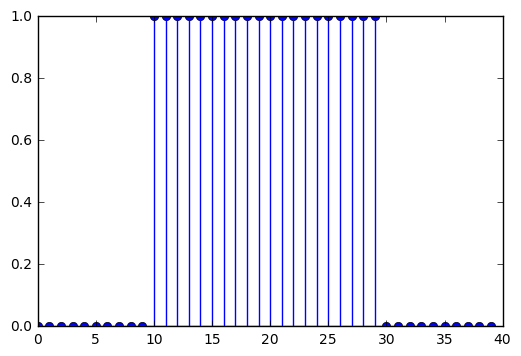

In [6]:
def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
    
    s = np.zeros((N, ))
    for n in range (n, N):
        s[n] = 1
    
    return s

signal2 = step(10, 40) - step(30, 40)

plt.figure()
plt.stem(signal2)

**2.4**

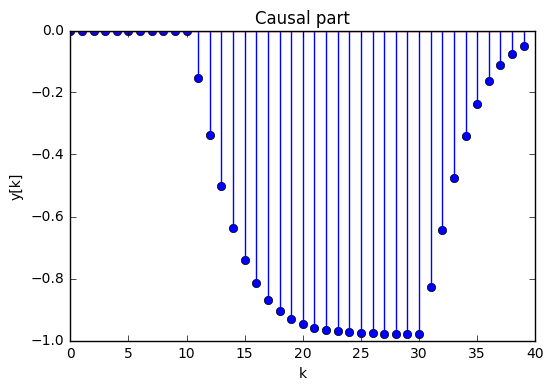

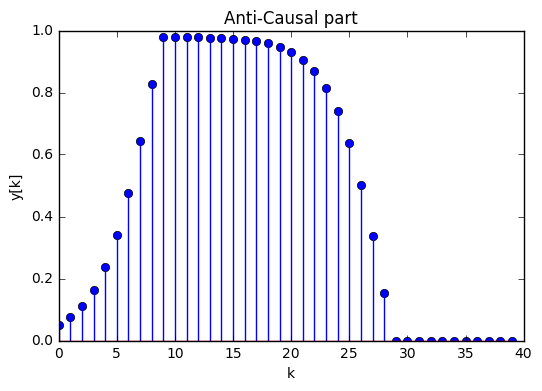

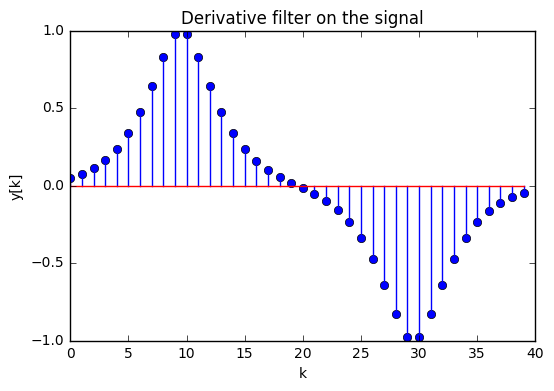

In [7]:
s = 0.5
Ts = 1
alpha = s * Ts
a = np.exp(-alpha)

yf_causal = np.zeros((40, ))
for i in range (2, 40):
    yf_causal[i] = -s*alpha*a*signal2[i-1] + 2.*a*yf_causal[i-1] - a**2*yf_causal[i-2]
    
k = np.arange (37, -1, -1)
yf_anti = np.zeros((40, ))
for i in k:
    yf_anti[i] = s*alpha*a*signal2[i+1] + 2.*a*yf_anti[i+1] - a**2*yf_anti[i+2]

plt.figure()
plt.stem (yf_causal)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Causal part')

plt.figure()
plt.stem (yf_anti)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Anti-Causal part')

yf = yf_causal + yf_anti
plt.figure()
plt.stem (yf)
plt.xlabel('k')
plt.ylabel('y[k]')
plt.title('Derivative filter on the signal')

**3.1**

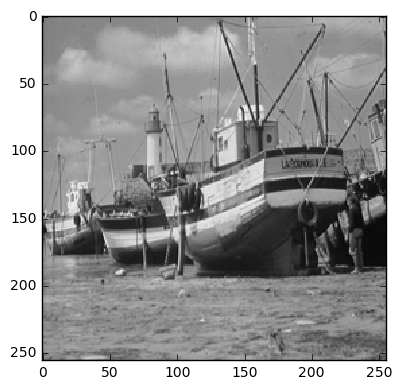

In [8]:
img = io.imread('../images/boat.256.gif')

plt.figure()
io.imshow(img)

**3.2** , **3.3**

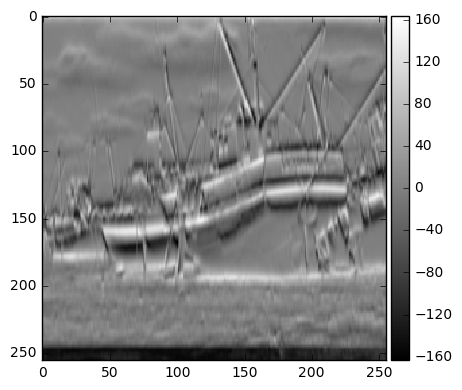

NameError: name 'img_fcasual' is not defined

In [9]:
rows = img.shape[0]
cols = img.shape[1]

s = 0.5
Ts = 1
alpha = s * Ts
a = np.exp(-alpha)



# 3.2 filter along the rows

img_fcausal2 = np.zeros((rows,cols))

for j in range(cols):
    for i in range(rows):
        img_fcausal2[i,j] = -s*alpha*a*img[i-1,j] + 2.*a*img_fcausal2[i-1,j] - a**2*img_fcausal2[i-2,j]
    
k = np.arange (247, -1, -1)
img_fanti2 = np.zeros((rows,cols))

for j in range(cols):
    for i in k:
        img_fanti2[i,j] = s*alpha*a*img[i+1,j] + 2.*a*img_fanti2[i+1,j] - a**2*img_fanti2[i+2,j]



img_filter2 = img_fcausal2 + img_fanti2

plt.figure()
io.imshow(img_filter2, cmap=plt.cm.gray)
plt.show()


# 3.3 filter along the columns 

img_fcausal = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        img_fcausal[i,j] = -s*alpha*a*img[i,j-1] + 2.*a*img_fcausal[i,j-1] - a**2*img_fcausal[i,j-2]
    
k = np.arange (247, -1, -1)
img_fanti = np.zeros((rows,cols))
for i in range(rows):
    for j in k:
        img_fanti[i,j] = s*alpha*a*img[i,j+1] + 2.*a*img_fanti[i,j+1] - a**2*img_fanti[i,j+2]


img_filter = img_fcasual + img_fanti

plt.figure()
io.imshow(img_filter, cmap=plt.cm.gray)







**3.4**